In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
# data read from google drive

df = pd.read_csv("/content/drive/MyDrive/Python programming/Dataset/vw.csv") 

In [36]:
print(df.shape)   # shape of the data row, column
print(df.columns) # column name
print(df.index)   # row index
df.head(5)        # first 5 row of dataframe
#df.tail(5)        # last 5 row of data

(15157, 8)
Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'mpg',
       'engineSize'],
      dtype='object')
RangeIndex(start=0, stop=15157, step=1)


,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,T-Roc,2019,25000,Automatic,13904,Diesel,49.6,2.0
1,T-Roc,2019,26883,Automatic,4562,Diesel,49.6,2.0
2,T-Roc,2019,20000,Manual,7414,Diesel,50.4,2.0
3,T-Roc,2019,33492,Automatic,4825,Petrol,32.5,2.0
4,T-Roc,2019,22900,Semi-Auto,6500,Petrol,39.8,1.5


In [37]:
df.info()         # for checking NaN value
#df.describe()    # for statistical parameter of numerical data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15157 entries, 0 to 15156
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         15157 non-null  object 
 1   year          15157 non-null  int64  
 2   price         15157 non-null  int64  
 3   transmission  15157 non-null  object 
 4   mileage       15157 non-null  int64  
 5   fuelType      15157 non-null  object 
 6   mpg           15157 non-null  float64
 7   engineSize    15157 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 947.4+ KB


In [38]:
# Working with categorical feature , create a function
def percent_count(data, col):

    col_count = data[col].value_counts(normalize = True)            # number of unique value in normalize
    col_count  = pd.DataFrame(col_count)                            # make a dataframe
    col_count = col_count.reset_index()                             # reset index
    col_count = col_count.rename(columns={"index" : col,
                                              col :  " % of cars"})  # rename columns using dictionary 
    col_count[" % of cars"] = col_count[" % of cars"] * 100          # percentage 
    col_count[" % of cars"] = col_count[" % of cars"].round(2)       # decimal round
    if col =="year": 
      col_count = col_count.sort_values(by = col,ascending= False)    # only year column sort in year wise 
      col_count = col_count[col_count[" % of cars"] > 0.21]           # and did not take all year because of good visualization 
      return col_count
    if col == "model" :
       col_count = col_count[col_count[" % of cars"] > 0.21]          # did not all model value because of good presentation
       return col_count
    else:
      return col_count

In [39]:
# function call for each categorical feature
model_count = percent_count(df, "model")
year_count = percent_count(df, "year")
transmission_count = percent_count(df, "transmission")
fuelType_count = percent_count(df, "fuelType")
display(fuelType_count)


,fuelType,% of cars
0,Petrol,56.43
1,Diesel,42.04
2,Hybrid,0.96
3,Other,0.57


In [40]:
# plot all categorical feature using a function
def bar_plot(data, x_col, y_col, color,yticks, rotation):
    sns.barplot(x = x_col, y = y_col, data = data, color = color) 
    plt.title(" Percentage of cars for each " + x_col)                                  
    plt.yticks(yticks)                                                 
    plt.xticks(rotation = rotation) 
  


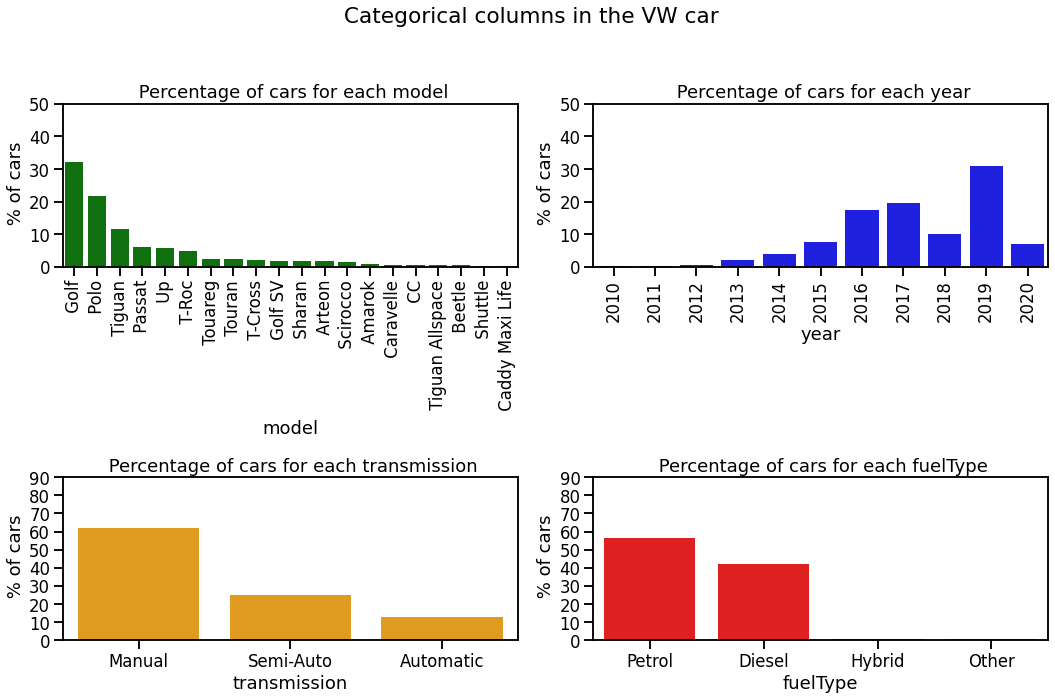

In [41]:
# function call and plot
sns.set_context("talk")                                                         
plt.figure(figsize= (15,10))

plt.subplot(2,2,1)  
bar_plot(model_count,"model", " % of cars","green",np.arange(0,60,10), 90) 
                                                   
plt.subplot(2,2,2)
bar_plot(year_count,"year", " % of cars","blue",np.arange(0,60,10), 90) 
                                                  

plt.subplot(2,2,3)
bar_plot(transmission_count,"transmission", " % of cars", "orange",np.arange(0,100,10), 0) 

plt.subplot(2,2,4)
bar_plot(fuelType_count,"fuelType", " % of cars","red", np.arange(0,100,10), 0) 

plt.suptitle(" Categorical columns in the VW car")  

plt.tight_layout(rect=[0, 0, 1, 0.90])                                                         
plt.show()   

In [77]:
display(df.head(5))

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,T-Roc,2019,25000,Automatic,13904,Diesel,49.6,2.0
1,T-Roc,2019,26883,Automatic,4562,Diesel,49.6,2.0
2,T-Roc,2019,20000,Manual,7414,Diesel,50.4,2.0
3,T-Roc,2019,33492,Automatic,4825,Petrol,32.5,2.0
4,T-Roc,2019,22900,Semi-Auto,6500,Petrol,39.8,1.5


In [78]:
display(df.describe())

,year,price,mileage,mpg,engineSize
count,15157.000000,15157.000000,15157.000000,15157.000000,15157.000000
mean,2017.255789,16838.952365,22092.785644,53.753355,1.600693
std,2.053059,7755.015206,21148.941635,13.642182,0.461695
min,2000.000000,899.000000,1.000000,0.300000,0.000000
25%,2016.000000,10990.000000,5962.000000,46.300000,1.200000
50%,2017.000000,15497.000000,16393.000000,53.300000,1.600000
75%,2019.000000,20998.000000,31824.000000,60.100000,2.000000
max,2020.000000,69994.000000,212000.000000,188.300000,3.200000


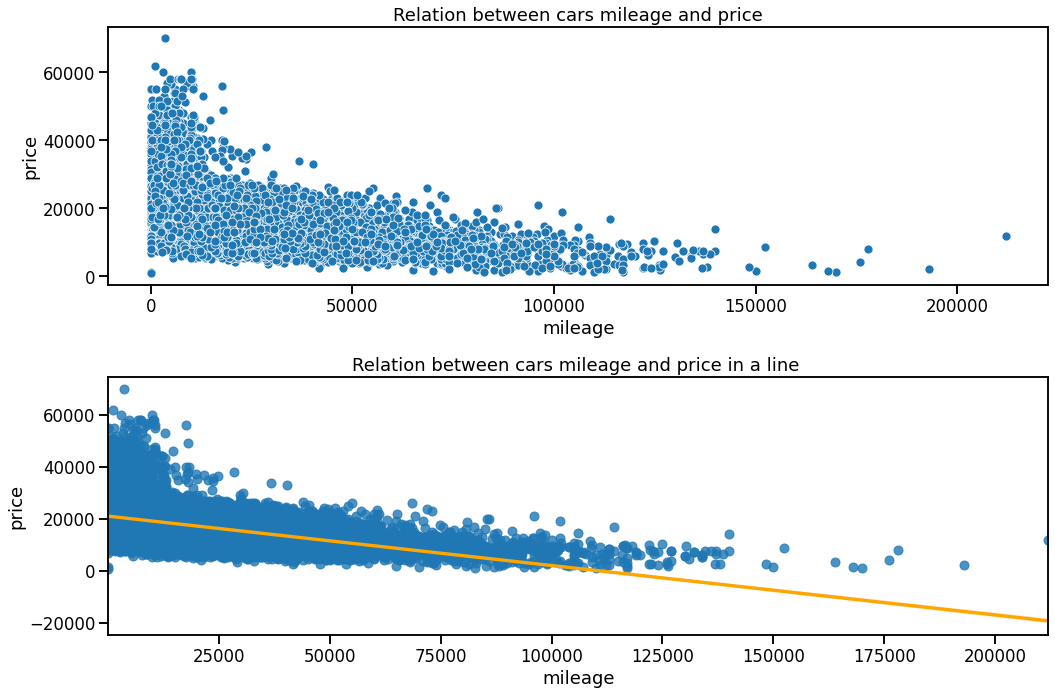

In [51]:
# working with numerical feature

plt.figure(figsize=(15,10))
# mileage vs price

plt.subplot(2,1,1)
sns.scatterplot(x='mileage', y='price', data=df)
plt.title("Relation between cars mileage and price")

#  mileage vs price in a trend line

plt.subplot(2,1,2)
sns.regplot(x='mileage', y='price', data=df, line_kws={'color':'orange'})
plt.title("Relation between cars mileage and price in a line ")

plt.tight_layout()
plt.show()





1.  From above figure, there is an inverse relation between mileage and price















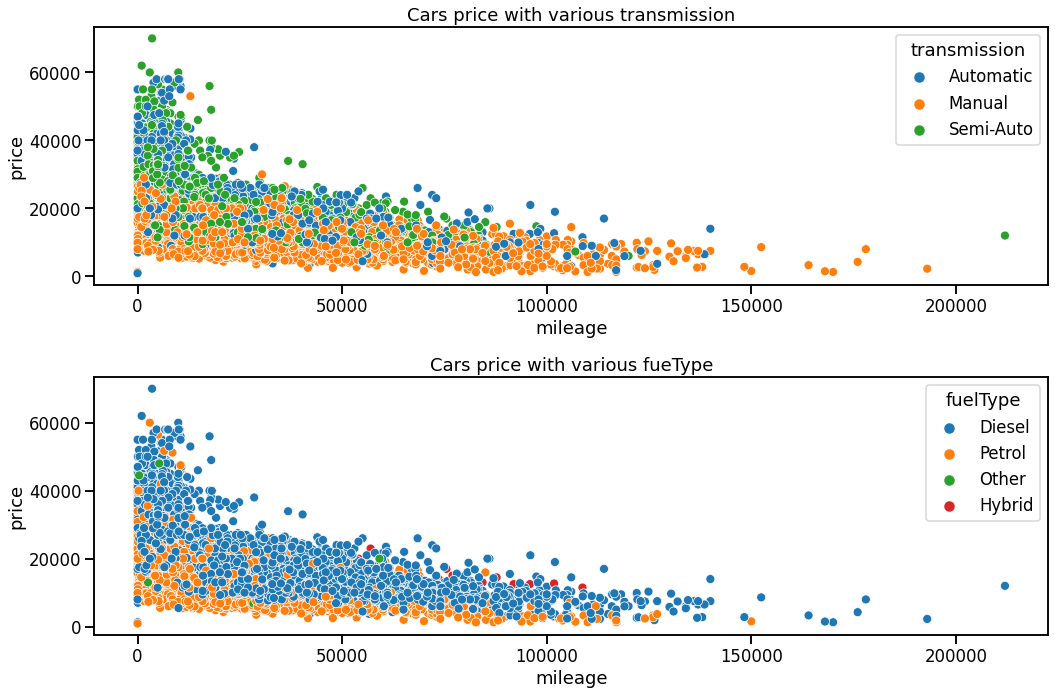

In [58]:
# adding a categorical feature: 'transmission'

plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
sns.scatterplot(x='mileage', y='price', data=df, hue='transmission')
plt.title("Cars price with various transmission")

# adding a categorical feature: 'fuelType'

plt.subplot(2,1,2)
sns.scatterplot(x='mileage', y='price', data=df, hue='fuelType')
plt.title("Cars price with various fuelType")

plt.tight_layout()
plt.show()


# Relation of Price for Transmission and fuelType
1.   Manual type car is lower price than Automatic and semi-manual
2.   Fuel : Diesel and Petrol are dominant feature than other and hybrid. The car driven by Diesel is higher price than driven by petrol



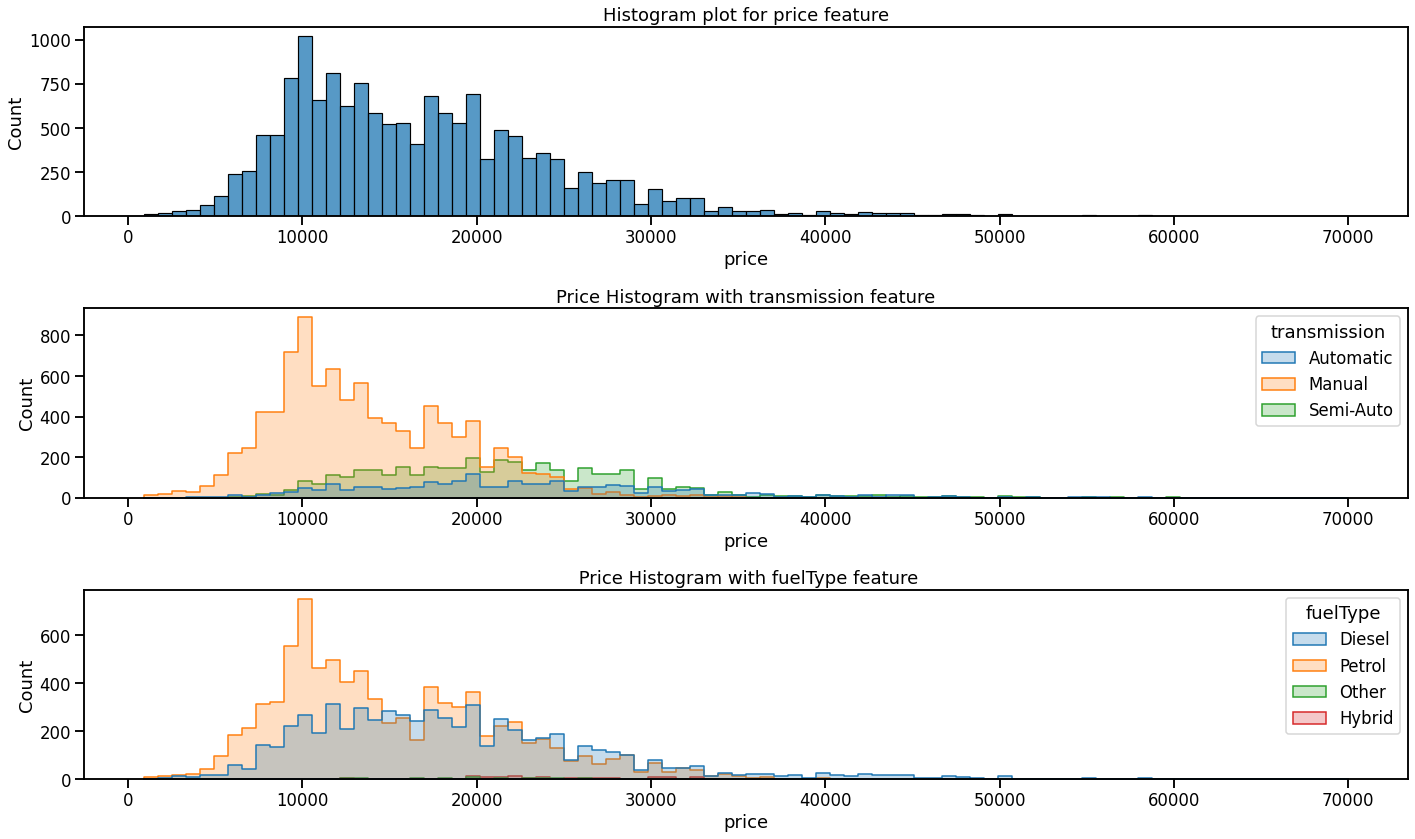

In [65]:
# histogram plot for price
plt.figure(figsize=(20,12))

plt.subplot(3,1,1)
sns.histplot(data=df, x='price')
plt.title("Histogram plot for price feature")

plt.subplot(3,1,2)
sns.histplot(data=df, x='price', hue='transmission', element="step")
plt.title("Price Histogram with transmission feature")

plt.subplot(3,1,3)
sns.histplot(data=df, x='price', hue='fuelType', element="step")
plt.title(" Price Histogram with fuelType feature")

plt.tight_layout()
plt.show()



1.   From Price Histogram , it shows that the highest price count is 10000
2.   Transmission type for Manual car is highest count then semi-auto and automatic transmission in a same price
3. Petrol type fuel car is the highest with price range 10000 to 30000 than Diesel type fuel car in the same range



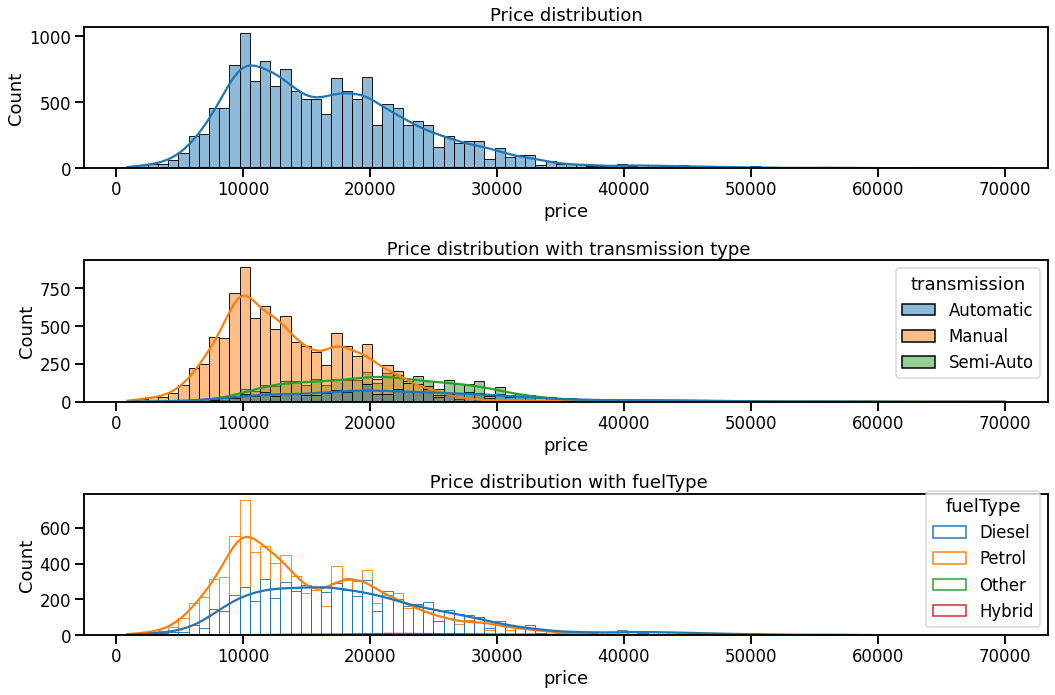

In [68]:
# distribution plot for price feature
plt.figure(figsize=(15,10))

plt.subplot(3,1,1)
sns.histplot(data=df, x='price', kde=True)
plt.title("Price distribution")

plt.subplot(3,1,2)
sns.histplot(data=df, x='price', kde=True, hue='transmission')
plt.title(" Price distribution with transmission type")

plt.subplot(3,1,3)
sns.histplot(data=df, x='price',kde=True, hue='fuelType', fill=False)
plt.title(" Price distribution with fuelType")

plt.tight_layout()
plt.show()



1. Price is bimodal distribution
2. Manual car price is bimodal, automatic and semi-automatic both are normally distributed
3. Petrol type car price is bimodal whereas Diesel type car is normally distributed



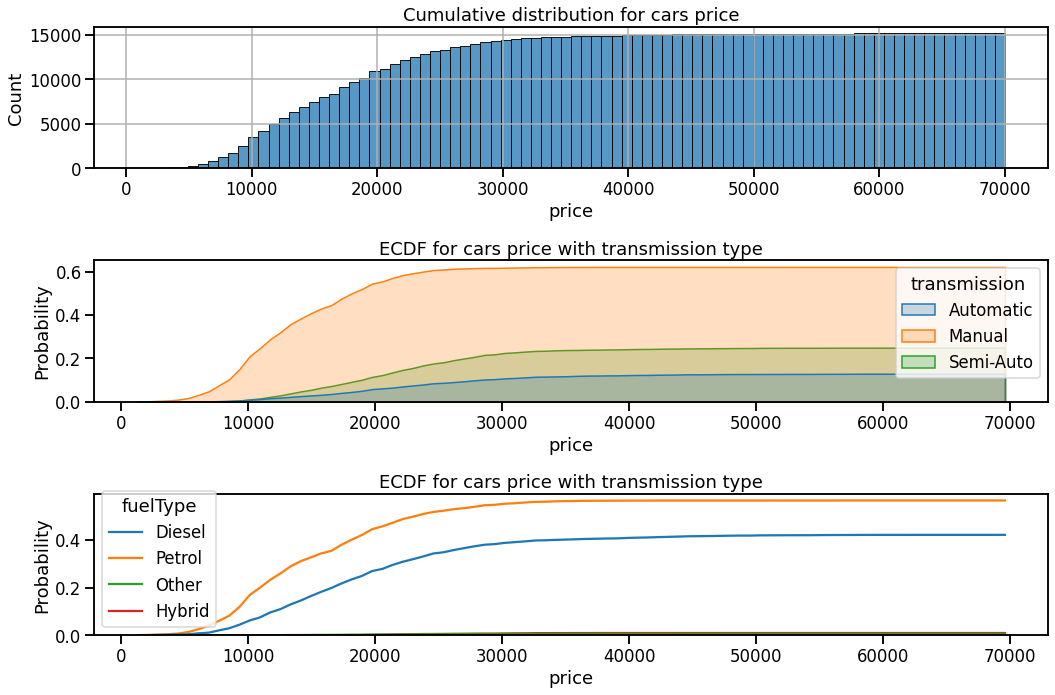

In [70]:
# ECDF plot for cars price

plt.figure(figsize=(15,10))
plt.subplot(3,1,1)
sns.histplot(data=df, x='price', cumulative=True)
plt.grid()
plt.title("Cumulative distribution for cars price")

plt.subplot(3,1,2)
sns.histplot(data=df, x='price', cumulative=True, stat='probability', hue='transmission', element="poly")
plt.title("ECDF for cars price with transmission type")

plt.subplot(3,1,3)
sns.histplot(data=df, x='price', cumulative=True, stat='probability', hue='fuelType', element="poly", fill=False)
plt.title("ECDF for cars price with transmission type")

plt.tight_layout()
plt.show()




1.   Cars price is 20000 almost for 10000 cars
2.   Probability for Manual car is higher than automatic and semi-automatic car for the same car price
3. Probability for petrol car is higher than Diesel car for the same car price



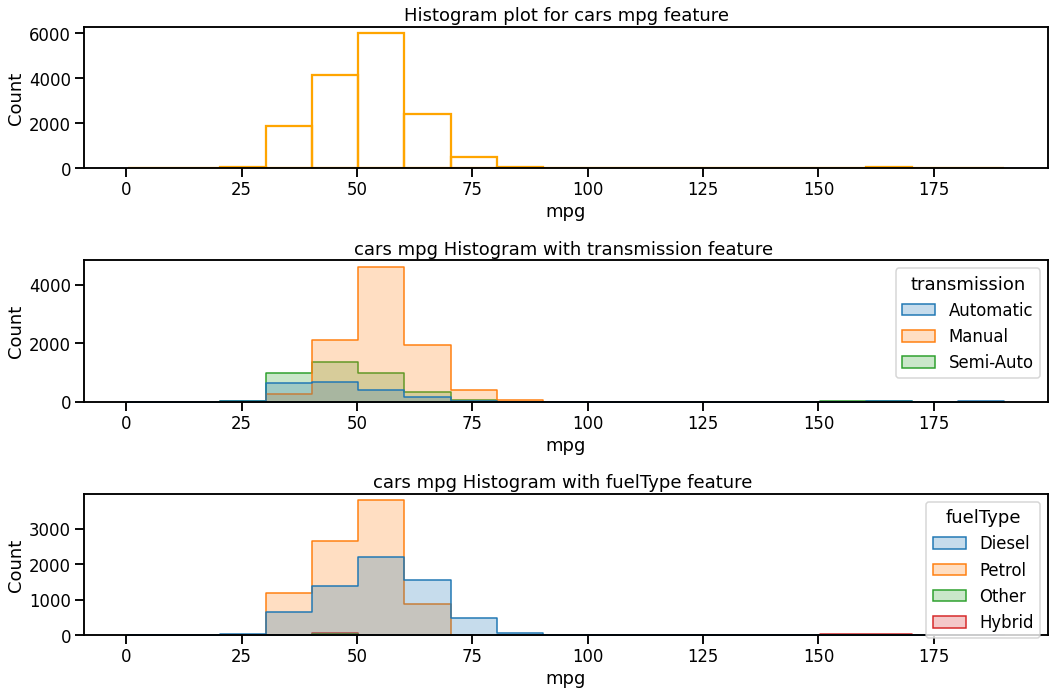

In [72]:
#histogram plot cars mpg feature
plt.figure(figsize=(15,10))

plt.subplot(3,1,1)
sns.histplot(data=df, x='mpg', binwidth=10, color='orange', fill=False)
plt.title("Histogram plot for cars mpg feature")

plt.subplot(3,1,2)
sns.histplot(data=df, x='mpg', binwidth=10, hue='transmission', element="step")
plt.title("cars mpg Histogram with transmission feature ")

plt.subplot(3,1,3)
sns.histplot(data=df, x='mpg', binwidth=10, hue='fuelType', element="step")
plt.title("cars mpg Histogram with fuelType feature ")

plt.tight_layout()
plt.show()




1.  the highest cars mpg count is 50 to 60 range
2.  cars mpg for manual type transmission is the highest and range is 50 to 60
3. cars mpg for petrol type fuel is highest range count




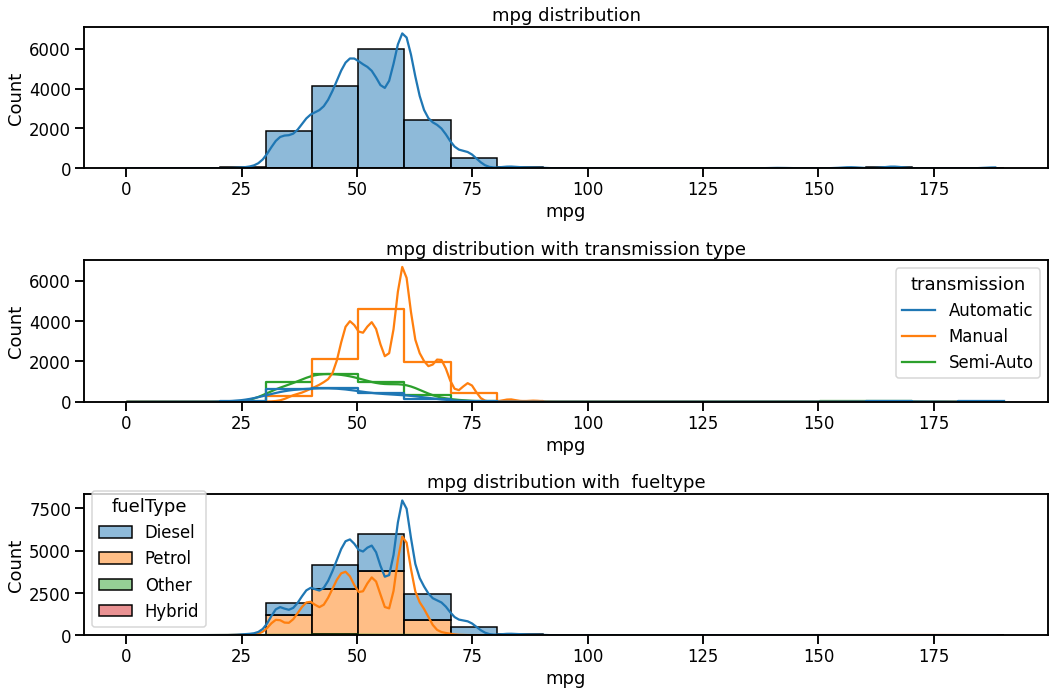

In [73]:
# distribution plot for cars mpg feature

plt.figure(figsize=(15,10))

plt.subplot(3,1,1)
sns.histplot(data=df, x='mpg', binwidth=10, kde=True)
plt.title("mpg distribution")

plt.subplot(3,1,2)
sns.histplot(data=df, x='mpg', binwidth=10, kde=True, hue='transmission',element="step", fill=False)
plt.title("mpg distribution with transmission type")

plt.subplot(3,1,3)
sns.histplot(data=df, x='mpg', binwidth=10, kde=True, hue='fuelType',multiple="stack")
plt.title("mpg distribution with  fueltype")

plt.tight_layout()
plt.show()



1.   cars mpg is bimodal distribution
2.   Manual cars mpg is bimodal; on the other hand, automatic and semi-automatic cars mpg are normally distributed 
3. Fueltype cars distribution for cars mpg are  multimodal distribution



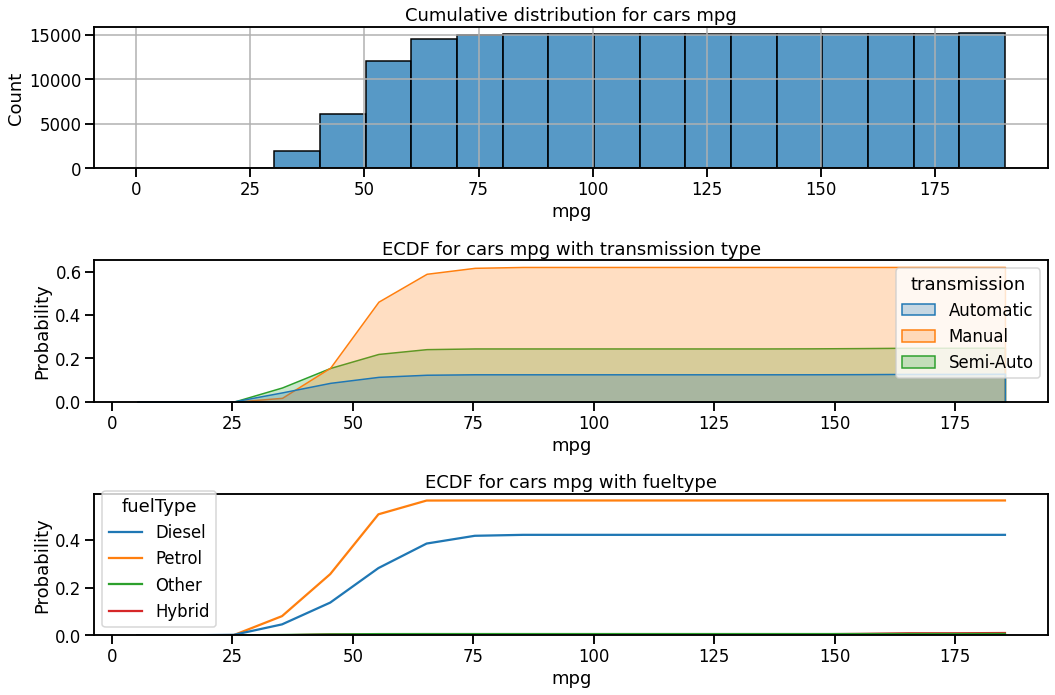

In [76]:
# ECDF plot for mpg feature
plt.figure(figsize=(15,10))

plt.subplot(3,1,1)
sns.histplot(data=df, x='mpg', binwidth=10, cumulative=True)
plt.grid()
plt.title("Cumulative distribution for cars mpg")

plt.subplot(3,1,2)
sns.histplot(data=df, x='mpg', binwidth=10, cumulative=True, stat='probability', hue='transmission',  element="poly")
plt.title("ECDF for cars mpg with transmission type")

plt.subplot(3,1,3)
sns.histplot(data=df, x='mpg', binwidth=10, cumulative=True, stat='probability', hue='fuelType', element="poly", fill=False)
plt.title("ECDF for cars mpg with fueltype")

plt.tight_layout()
plt.show()




1.   Cars mpg is 50 for almost 6000 cars
2.  Probability for Manual cars mpg is higher than automatic and semi-automatic cars mpg for the same car mpg
3. Probability for petrol cars mpg is higher than Diesel cars mpg for the same cars mpg




